In this notebook we will look at satellite imagery data from Masachusetts and detect roads from the images. 

- The dataset has been obtained from  [kaggle](https://www.kaggle.com/insaff/massachusetts-roads-dataset)

- The data is organized as follows: 

```
.
└── training
    ├── input
    └── output
├── testing
│   ├── input
│   └── output

```
where input folder contains the images and output folder contains the corresponding mask images. 

- The size of the images is: <br/>
(length, width, color_channels) = (1500, 1500, 3) 

- The two tasks in the analysis are:
  - Data Pipeline:  Preprocessing the raw images to make them ready for the deep learning model
  - Deep Learning model: Build a deep learning model to identify roads from the images

- Data pipeline has accomplished the following steps: 
  - Crop input images from (1500, 1500, 3) into multiple smaller images of size (256, 256, 3) 
  - Apply similar operation on the mask images 
  - Save images as h5 files. 

- This notebook will focus on the Deep Learning model building with data inputs being the h5 images and masks from the data pipeline done in a different notebook.   



In [ ]:
#Detecting roads from video
#images not taken at cruising altitude should be discarded
import cv2
from google.colab.patches import cv2_imshow
input_video = cv2.VideoCapture('/content/drive/My Drive/P1rural/droneFootage1.mp4')

# Metadata from the input video
frames_per_second = int(input_video.get(cv2.CAP_PROP_FPS))
frame_width = int(input_video.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(input_video.get(cv2.CAP_PROP_FRAME_HEIGHT))

num_frames = int(input_video.get(cv2.CAP_PROP_FRAME_COUNT))



print('Metadata from input video:',
      '\nFrames per second:', frames_per_second,
      '\nFrame width:', frame_width, 
      '\nFrame height:', frame_height)
codec = cv2.VideoWriter.fourcc(*'XVID')
video_writer = cv2.VideoWriter('output_video.mp4', 
                               codec, 
                               frames_per_second, 
                               (frame_width, frame_height))
# An array to hold the locations of faces that are detected on individual frames
face_locations = []

# A counter to keep track of the number of frames processed
count = 0
one_photo = []

# Loop through all the frames in the video
while (count != 3000):
  # Read the video to retrieve individual frames. 'frame' will reference the inidivdual frames read from the video.
  ret, frame = input_video.read()

  # Check the 'ret' (return value) to see if we have read all the frames in the video to exit the loop
  if not ret:
    print('Processed all frames')
    break

  # Convert the image (frame) to RGB format as by default Open CV uses BGR format. 
  # This conversion is done as face_recognition and other libraries usually use RGB format.
  rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

  
  # Loop through the face locations array and draw a rectangle around each face that is detected in the frame
  for top, right, bottom, left in face_locations:
    cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

  # Write the frame to the output vide0
  #video_writer.write(frame)
  x = 680 #30 frames per second, about 22 seconds captures frame for each new area
  # Print for every x frames processed
  if(count % x == 0):
    frame = cv2.resize(frame, (256, 256), interpolation=cv2.INTER_AREA)
    cv2_imshow(frame)
    img = frame
    img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_AREA)
    one_photo.append(img)

    print('Processed', count, 'frames')

  count += 1

one_photo = np.array(one_photo)

predictions2 = model.predict(one_photo,verbose=1)

# Release to close all the resources that we have opened for reading and writing video
#input_video.release()
#video_writer.release() 

#cv2.destroyAllWindows()

In [ ]:
#https://github.com/Nirzaree/Detecting-Roads-from-Satellite-Images


#You would still have to manually look at and put the data into different files. But for labelling, you can just make a python class
#and for first file give it a rural/path attribute, and otherwise just give it city/residential

### Setup

In [3]:
!pip install git+https://github.com/qubvel/segmentation_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-audeynez
  Running command git clone -q https://github.com/qubvel/segmentation_models /tmp/pip-req-build-audeynez
  Running command git submodule update --init --recursive -q
     |████████████████████████████████| 50 kB 2.7 MB/s 
  Created wheel for segmentation-models: filename=segmentation_models-1.0.1-py3-none-any.whl size=33809 sha256=6fd616f13d5bc86c6c0c8f031139927b1a688aa54f1d98e5fa71a8a2aedaf249
  Stored in directory: /tmp/pip-ephem-wheel-cache-5136lj6i/wheels/91/c4/cb/a53fedf4b956b22b486a1f135859dacfd3809d410e34e7906c
Successfully built segmentation-models


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2
from google.colab.patches import cv2_imshow
import os
import h5py

from sklearn.model_selection import train_test_split

In [6]:
seed = 42

### Load Data

For the model training we are loading a subset (2000 images) of the complete dataset (which is ~21000 images), since larger training size requires more RAM than is available in the Colab Basic version, leading to training session crashing. 

In [ ]:
#images = '/content/drive/MyDrive/training/input'
#masks = '/content/drive/MyDrive/training/output'



Rotation


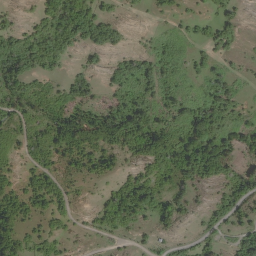

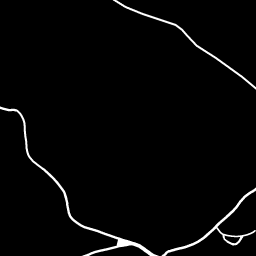

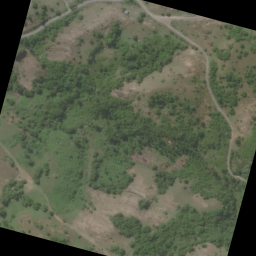

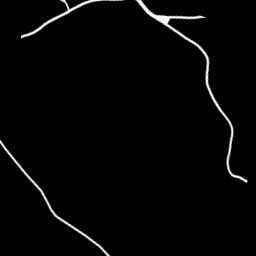

(256, 256, 3)

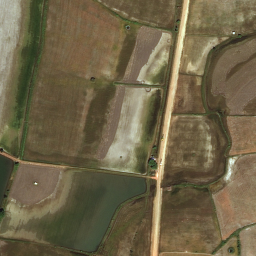

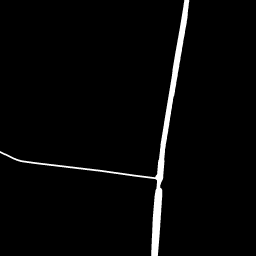

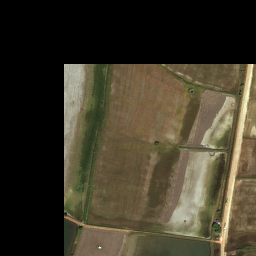

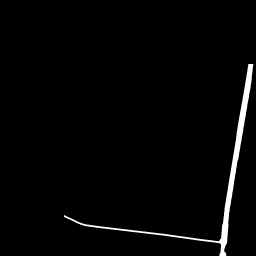

In [ ]:
#translating images
import cv2 
from google.colab.patches import cv2_imshow

import cv2
import numpy as np
  
image = cv2.imread('8048_sat.jpg')
image = cv2.resize(image, (256, 256), interpolation=cv2.INTER_AREA)

image2 = cv2.imread('8048_mask.png')
image2 = cv2.resize(image2, (256, 256), interpolation=cv2.INTER_AREA)
# Store height and width of the image
height, width = image.shape[:2]
  
quarter_height, quarter_width = height / 4, width / 4
  
T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])
  
# We use warpAffine to transform
# the image using the matrix, T
img_translation = cv2.warpAffine(image, T, (width, height))

img_translation2 = cv2.warpAffine(image2, T, (width, height))
  
cv2_imshow(image)
cv2_imshow(image2)

cv2_imshow(img_translation)
cv2_imshow(img_translation2)

In [ ]:
#crop and resize. Thicker (and thinner) roads

import cv2 as cv

def zoom(img, zoom_factor=2):
    return cv.resize(img, None, fx=zoom_factor, fy=zoom_factor)

img = cv.imread(img_path)
cropped = img[200:300, 150:250]
zoomed = zoom(img, 3)
zoomed_and_cropped = zoom(cropped, 3)

### Explore Data

### Plot few masks and images

## Split data

In [7]:
data = '/content/drive/MyDrive/P2city'
#dataCity P2city

In [ ]:
#Normal Pre-processing, convert images to np.array
train_inp = []
train_masks = []
for i in range(0, 1000000):
  #ind = str((i)) + "_sat" + ".png"
  if (i % 10000 == 0):
    print(i)
  ind = str((i)) + "_sat" + ".jpg"
  path = os.path.join(data, ind)
  img = cv2.imread(path)
  try:
    img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_AREA)
  except:
    continue
  ind2 = str((i)) + "_mask" + ".png"
  path2 = os.path.join(data, ind2)
  mask_img = cv2.imread(path2)
  #print(mask_img)
  #if mask_img == None:
    #continue
  try:
    mask_img = cv2.resize(mask_img, (256, 256), interpolation=cv2.INTER_AREA)
    mask_img = cv2.cvtColor(mask_img, cv2.COLOR_BGR2GRAY)
  except:
    continue

  train_inp.append(img)
  train_masks.append(mask_img)

images = np.array(train_inp)
masks = np.array(train_masks)
print(images.shape)
print(masks.shape)

#100000 iterations to 1h 30, GPU should be fine, but would need higher RAM for that, 
#Can just train multiple times on different parts of the dataset

#Can possibly do multiple batches, can train on all thew images in batches?

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000


In [ ]:
print(ind2) #643427_mask.png. #744056_mask.png know where you left off

999764_mask.png


In [ ]:
print(images.shape)
print(masks.shape)

(3703, 256, 256, 3)
(3703, 256, 256)


In [ ]:
import numpy as np

In [ ]:
np.save('/content/drive/MyDrive/ruralSortImages.npy', images)
np.save('/content/drive/MyDrive/ruralSortMasks.npy', masks)

In [ ]:
images = np.load("/content/drive/MyDrive/ruralSortImages.npy")
masks = np.load("/content/drive/MyDrive/ruralSortMasks.npy")

In [ ]:
#rotated_images = np.concatenate((images, images1), axis=0)
#rotated_images = np.concatenate((rotated_images, images2), axis=0)

In [ ]:
#print(rotated_images.shape)
#print(rotated_masks.shape)

(6226, 256, 256, 3)
(6226, 256, 256)


In [ ]:
rotated_masks = np.expand_dims(rotated_masks, -1)

In [ ]:
#image translation
'''
image = cv2.imread('8048_sat.jpg')
image = cv2.resize(image, (256, 256), interpolation=cv2.INTER_AREA)

image2 = cv2.imread('8048_mask.png')
image2 = cv2.resize(image2, (256, 256), interpolation=cv2.INTER_AREA)
# Store height and width of the image
height, width = image.shape[:2]
  
quarter_height, quarter_width = height / 4, width / 4
  
T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])
  
# We use warpAffine to transform
# the image using the matrix, T
img_translation = cv2.warpAffine(image, T, (width, height))

img_translation2 = cv2.warpAffine(image2, T, (width, height))
'''

In [ ]:
#Rotating images, translating
#mask = cv2.imread('612436_mask.png')
#img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_AREA)
#mask = cv2.resize(mask, (256, 256), interpolation=cv2.INTER_AREA)
#mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
#cv2_imshow(img)
#cv2_imshow(mask)
#height, width, channels = img.shape
#height2, width2 = mask.shape
angle = 55
scale = 0.1
mode = 'shrink'
angle += 1
#scale -= 0.02
#train_inp = []
#train_masks = []

#Rotated Pre-processing, convert images to np.array

for i in range(0, 1000000):
  angle += 1
  angle = angle % 360
  #scale+=1

  #ind = str((i)) + "_sat" + ".png"
  ind = str((i)) + "_sat" + ".jpg"
  path = os.path.join(data, ind)
  img = cv2.imread(path)
  try:
    img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_AREA)
    height, width, channels = img.shape
    r = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)
    img = cv2.warpAffine(img, r, (width, height))
    if i > 700000 and i % 3 == 0:
      quarter_height, quarter_width = height / 4, width / 4
    
      T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])
    
      # We use warpAffine to transform
      # the image using the matrix, T
      img = cv2.warpAffine(img, T, (width, height))
      img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_AREA)
    
  except:
    continue
  ind2 = str((i)) + "_mask" + ".png"
  path2 = os.path.join(data, ind2)
  mask_img = cv2.imread(path2)
  #print(mask_img)
  #if mask_img == None:
    #continue
  try:
    mask_img = cv2.resize(mask_img, (256, 256), interpolation=cv2.INTER_AREA)
    mask_img = cv2.cvtColor(mask_img, cv2.COLOR_BGR2GRAY)
    height2, width2 = mask_img.shape
    r2 = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)
    mask_img = cv2.warpAffine(mask_img, r2, (width2, height2))

    if i > 700000 and i % 3 == 0:
      quarter_height, quarter_width = height2 / 4, width2 / 4

      T = np.float32([[1, 0, quarter_width], [0, 1, quarter_height]])

      mask_img = cv2.warpAffine(mask_img, T, (width, height))
      mask_img = cv2.resize(mask_img, (256, 256), interpolation=cv2.INTER_AREA)
  except:
    continue

  train_inp.append(img)
  train_masks.append(mask_img)

rotated_images = np.array(train_inp)
rotated_masks = np.array(train_masks)
print(rotated_images.shape)
print(rotated_masks.shape)

#100000 iterations to 1h 30, GPU should be fine, but would need higher RAM for that, 
#Can just train multiple times on different parts of the dataset

#Can possibly do multiple batches, can train on all thew images in batches?

(7406, 256, 256, 3)
(7406, 256, 256)


In [ ]:
rotated_images = np.load("/content/drive/MyDrive/ruralAugmentedImages.npy")
rotated_masks = np.load("/content/drive/MyDrive/ruralAugmentedMasks.npy")

In [ ]:
rotated_images.shape

(1478, 256, 256, 3)

In [ ]:
import numpy as np
np.save('/content/drive/MyDrive/ruralAugmentedImages.npy', rotated_images)
np.save('/content/drive/MyDrive/ruralAugmentedMasks.npy',rotated_masks)

In [ ]:
masks = np.expand_dims(masks, -1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    images,
    masks,
    test_size = 0.23,
    random_state = seed
)

In [ ]:

rotated_masks = np.expand_dims(rotated_masks, -1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    rotated_images,
    rotated_masks,
    test_size = 0.23,
    random_state = seed
)

In [ ]:
#masks = np.expand_dims(masks, -1)

In [ ]:
#y_train = np.expand_dims(y_train, -1)
#y_test = np.expand_dims(y_test, -1)

In [ ]:
del images,masks #to save space
del rotated_images, rotated_masks #to save space

In [ ]:
print("Training Dataset: ")
print("number of samples = ",X_train.shape[0])
print("shape of images = ",X_train.shape)
print("shape of masks = ",y_train.shape)
print("Test Dataset: ")
print("number of samples = ",X_test.shape[0])
print("shape of images = ",X_test.shape)
print("shape of masks = ",y_test.shape)

Training Dataset: 
number of samples =  2851
shape of images =  (2851, 256, 256, 3)
shape of masks =  (2851, 256, 256, 1)
Test Dataset: 
number of samples =  852
shape of images =  (852, 256, 256, 3)
shape of masks =  (852, 256, 256, 1)


## Define Model

In [ ]:
from segmentation_models import Unet
import segmentation_models as sm

sm.set_framework('tf.keras')
sm.framework()

Segmentation Models: using `keras` framework.


'tf.keras'

In [ ]:
model = Unet(
    backbone_name = 'efficientnetb0',
    encoder_weights = 'imagenet',
    encoder_freeze = False
)

16804768/16804768 [==============================] - 0s 0us/step


### Define custom loss metric and accuracy metric

In [ ]:
#Source: https://towardsdatascience.com/metrics-to-evaluate-your-semantic-segmentation-model-6bcb99639aa2
from keras import backend as K
def iou_coef(y_true, y_pred, smooth=1):
  intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
  union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
  iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
  
  return iou

In [ ]:
def dice_coef(y_true, y_pred, smooth = 1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def soft_dice_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)

#### Hyperparameters

In [ ]:
EPOCHS = 25
LEARNING_RATE = 0.0001
BATCH_SIZE = 16

#### Define callbacks

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

In [ ]:
model_path = './Models/modelRural5th.h5'

modelcheckpoint = ModelCheckpoint(
    filepath = model_path,
    monitor = "val_loss",
    mode = "min",
    save_best_only = True,
    verbose = 1
)

earlystopping = EarlyStopping(
    monitor = "val_loss",
    min_delta = 0,
    patience = 5,
    verbose = 1,
    restore_best_weights = True 
)

reduceLR = ReduceLROnPlateau(
    monitor = "val_loss",
    factor = 0.1,
    patience = 5,
    verbose = 1,
    min_delta = 1e-4 
)

#### Compile model

In [ ]:
model.compile(
    optimizer = Adam(learning_rate = LEARNING_RATE),
    loss = soft_dice_loss,
    metrics = [iou_coef]
)

In [ ]:
X_train.shape

(2851, 256, 256, 3)

In [ ]:
tst = (y_train/255)
tst.shape

(2851, 256, 256, 1)

### Train model

In [ ]:
history = model.fit(
    X_train,
    y_train/255,
    validation_data = (X_test,y_test/255),
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    callbacks = [modelcheckpoint, earlystopping, reduceLR]
)
#Runtime can crash if too much RAM

Epoch 1/25
179/179 [==============================] - ETA: 0s - loss: 0.3819 - iou_coef: 0.4392
Epoch 1: val_loss improved from inf to 0.36262, saving model to ./Models/modelRural5th.h5
179/179 [==============================] - 40s 172ms/step - loss: 0.3819 - iou_coef: 0.4392 - val_loss: 0.3626 - val_iou_coef: 0.4628 - lr: 1.0000e-04
Epoch 2/25
179/179 [==============================] - ETA: 0s - loss: 0.3406 - iou_coef: 0.4815
Epoch 2: val_loss improved from 0.36262 to 0.35795, saving model to ./Models/modelRural5th.h5
179/179 [==============================] - 29s 163ms/step - loss: 0.3406 - iou_coef: 0.4815 - val_loss: 0.3579 - val_iou_coef: 0.4683 - lr: 1.0000e-04
Epoch 3/25
179/179 [==============================] - ETA: 0s - loss: 0.3162 - iou_coef: 0.5103
Epoch 3: val_loss improved from 0.35795 to 0.34719, saving model to ./Models/modelRural5th.h5
179/179 [==============================] - 29s 164ms/step - loss: 0.3162 - iou_coef: 0.5103 - val_loss: 0.3472 - val_iou_coef: 0.479

In [ ]:
model.save(model_path)

In [ ]:
data = "/content/drive/MyDrive/train"

In [ ]:
#rotated_masks = np.expand_dims(rotated_masks, -1)

In [ ]:
'''
X_train = np.load("/content/drive/MyDrive/X_train6k.npy")
X_test = np.load("/content/drive/MyDrive/X_test6k.npy")
y_train = np.load("/content/drive/MyDrive/y_train6k.npy")
y_test = np.load("/content/drive/MyDrive/y_test6k.npy")
'''

In [ ]:
'''
X_train, X_test, y_train, y_test = train_test_split(
    rotated_images,
    rotated_masks,
    test_size = 0.23,
    random_state = seed
)
'''

In [ ]:
'''
import numpy as np
np.save('/content/drive/MyDrive/X_train6k.npy', X_train)
np.save('/content/drive/MyDrive/X_test6k.npy', X_test)
np.save('/content/drive/MyDrive/y_train6k.npy', y_train)
np.save('/content/drive/MyDrive/y_test6k.npy', y_test)
'''

In [ ]:
'''
np.save('/content/drive/MyDrive/X_train6kNonRot.npy', X_train)
np.save('/content/drive/MyDrive/X_test6kNonRot.npy', X_test)
np.save('/content/drive/MyDrive/y_train6kNonRot.npy', y_train)
np.save('/content/drive/MyDrive/y_test6kNonRot.npy', y_test)
'''

In [ ]:
'''
print("Training Dataset: ")
print("number of samples = ",X_train.shape[0])
print("shape of images = ",X_train.shape)
print("shape of masks = ",y_train.shape)
print("Test Dataset: ")
print("number of samples = ",X_test.shape[0])
print("shape of images = ",X_test.shape)
print("shape of masks = ",y_test.shape)
'''

Training Dataset: 
number of samples =  1056
shape of images =  (1056, 256, 256, 3)
shape of masks =  (1056, 256, 256, 1)
Test Dataset: 
number of samples =  316
shape of images =  (316, 256, 256, 3)
shape of masks =  (316, 256, 256, 1)


In [ ]:
#y_train = np.expand_dims(y_train, -1)
#y_test = np.expand_dims(y_test, -1)

In [ ]:
model.save('/content/drive/MyDrive/modelRuralSortedAugmented.h5')

## Validate Model

In [ ]:
from keras.models import load_model

In [ ]:
# '/content/drive/MyDrive/modelRural.h5'

In [ ]:
#model = load_model("modelRural4.h5", #./Models/
                   #custom_objects = {'soft_dice_loss': soft_dice_loss, 'iou_coef': iou_coef})

NameError: ignored

In [ ]:
model = load_model("/content/drive/MyDrive/modelsRural/modelRuralSortedAugmented.h5",
                   custom_objects = {'soft_dice_loss': soft_dice_loss, 'iou_coef': iou_coef}) #0.178 train loss, 0.20 val loss

In [ ]:
model = load_model("/content/drive/MyDrive/modelsRural/modelRural6k.h5",
                   custom_objects = {'soft_dice_loss': soft_dice_loss, 'iou_coef': iou_coef}) #0.17 train loss, 0.27 val loss

In [ ]:
#model = load_model("/content/drive/MyDrive/modelRural5th.h5",
                   #custom_objects = {'soft_dice_loss': soft_dice_loss, 'iou_coef': iou_coef}) #0.20 train loss, 0.32933 val loss

In [ ]:
images = np.load("/content/drive/MyDrive/ruralDataImages.npy")
masks = np.load("/content/drive/MyDrive/ruralDataMasks.npy")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    images,
    masks,
    test_size = 0.23,
    random_state = seed
)

In [ ]:
save_X_test = X_test

In [ ]:
predictions = model.predict(X_test,verbose=1)

27/27 [==============================] - 2s 30ms/step


Run Model on Images

In [ ]:
#images = '/content/drive/MyDrive/ruralImages2'

In [ ]:
'''
#Pre-processing, convert images to matrices/tensor
test_inp = []

for i in range(9):
  ind = str((i)) + ".png"
  path = os.path.join(images, ind)
  img = cv2.imread(path)
  try:
    img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_AREA)
  except:
    continue
  test_inp.append(img)

test_inp = np.array(test_inp)
print(test_inp.shape)

#700000 iterations to 1h 30, GPU should be fine, but would need higher RAM for that, 
#Can just train multiple times on different parts of the dataset

#170000 iterations took 10 minutes, 1000 images
'''

error: ignored

In [ ]:

one_photo = []
img = cv2.imread('arialview-of-small-townships-in-rural-burundi-BG51XC.jpg')
img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_AREA)
one_photo.append(img)
one_photo = np.array(one_photo)


In [ ]:
predictions2 = model.predict(one_photo,verbose=1)

NameError: ignored

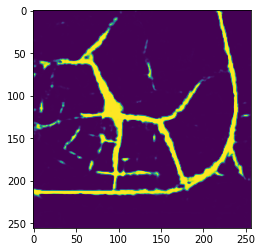

In [ ]:
plt.imshow(predictions2[0].reshape(256,256))

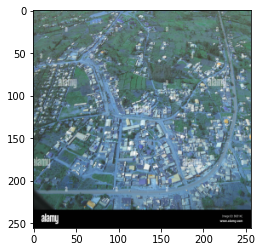

In [ ]:
plt.imshow(one_photo[0])

In [ ]:
#predictions3 = model.predict(one_photo,verbose=1)

1/1 [==============================] - 1s 973ms/step


In [ ]:
#predictions2.shape

(8, 256, 256, 1)

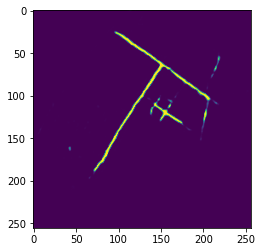

In [ ]:
#plt.imshow(predictions2[1].reshape(256,256))

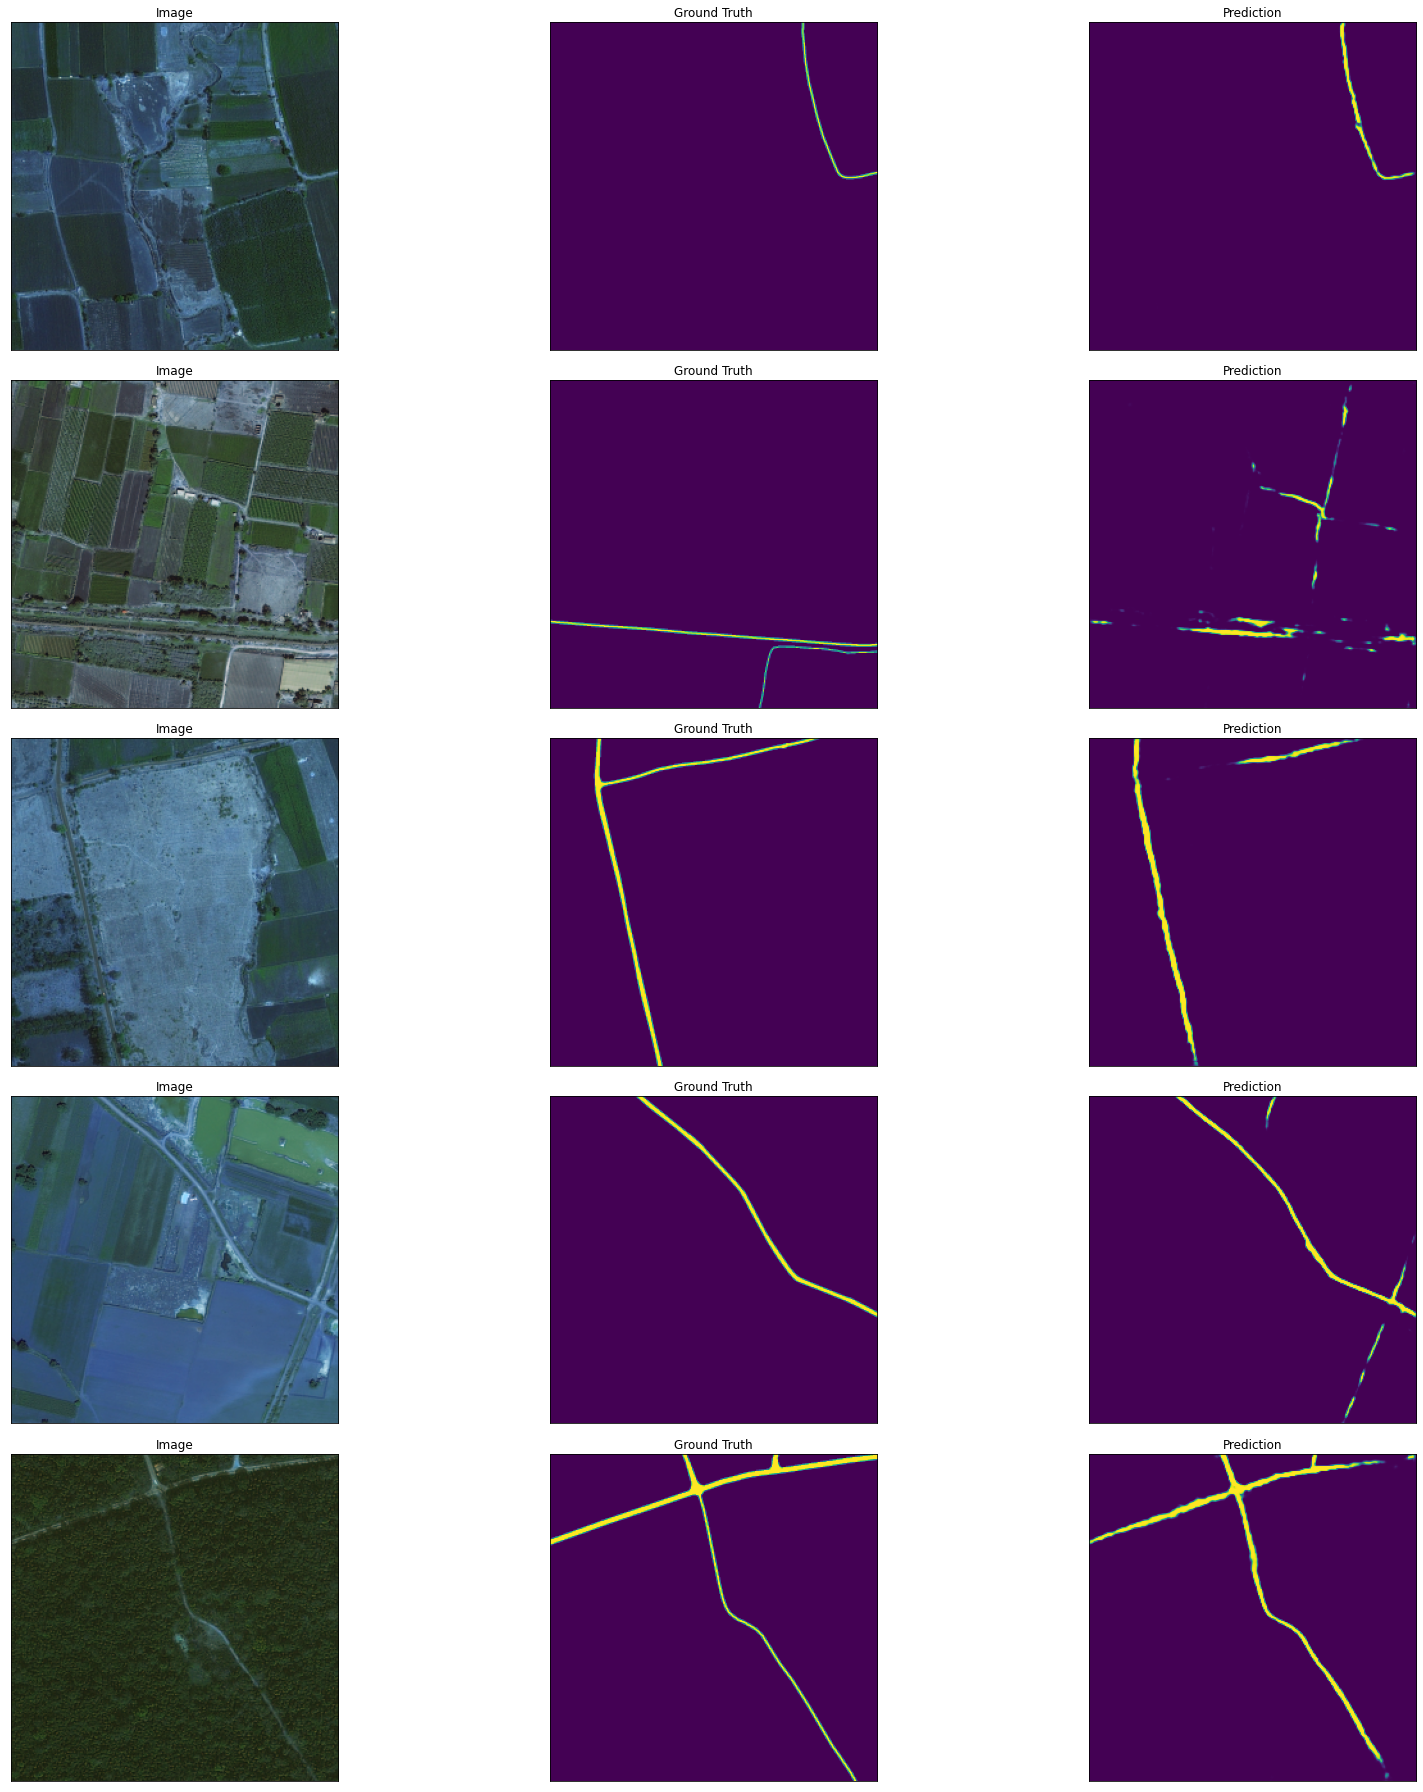

In [ ]:
cnt = 0
plt.figure(figsize = (25,25))
for ind in range(90, 208):
  try:
    cnt += 1
    plt.subplot(5,3,cnt)
    plt.imshow(X_test[ind])
    plt.xticks([])
    plt.yticks([])
    plt.title('Image')

    cnt += 1
    plt.subplot(5,3,cnt)
    plt.imshow(y_test[ind].reshape(256,256))
    plt.xticks([])
    plt.yticks([])
    plt.title('Ground Truth')

    cnt += 1  
    plt.subplot(5,3,cnt)
    plt.imshow(predictions[ind].reshape(256,256))
    plt.xticks([])
    plt.yticks([])
    plt.title('Prediction')
  except:
    continue
plt.tight_layout()
#4th is good at finding paths

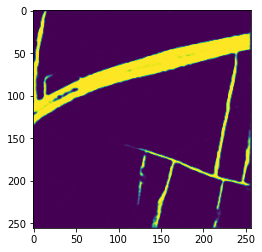

In [ ]:
plt.imshow(predictions[1].reshape(256,256))

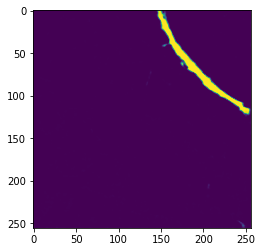

In [ ]:
plt.imshow(predictions[11].reshape(256,256))

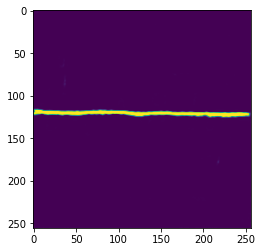

In [ ]:
plt.imshow(predictions[3].reshape(256,256))

### Summary

- In this report, we built a UNet Deep Learning model for segmenting aerial images of Masachusetts to identify roads from the images. 

- Due to RAM constraints, the model was built with a small fraction (2000 images) of the total training data (~21000 images) however the predictions of the model are still quite good on the test images. 

- Further work on the model front can be along the following lines:
  - Training the model on the entire training dataset
  - Transforming input images (rotation, scaling, translation) to add more diversity to the training dataset 
  - Configuring various parameters of the Unet model